In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

sns.set_theme()

%matplotlib inline

directory = "/Users/nassimgharbi/Documents/Udacity-Data-Science_Nano/Week-1_Intro_to_Data_Science/Data_sets/Airbnb/Seattle/"
df_listings = pd.read_csv(directory+"listings.csv")
df_reviews = pd.read_csv(directory+"reviews.csv")
df_calendar = pd.read_csv(directory+"calendar.csv")

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

# Data cleaning

In [3]:
#cleaning & formatting price columns 
dataframes = [df_listings, df_reviews, df_calendar]

#drop missing values in price columns & convert to float
#missing values are dropped as price is used for all subsequent operations
#imputing values not practical as prices vary along different dimensions + might distort results
for df in dataframes:
    for col in df.select_dtypes(include="object").columns:
        if np.all(df[col].dropna().str.startswith("$")):
            df[col] = df[col].str.replace('\$|\,',"").astype("float")
          

# Data Exploration

In [4]:
display(df_listings.shape)
df_listings.describe()

(3818, 92)

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,calculated_host_listings_count,reviews_per_month
count,3.818000e+03,3.818000e+03,3.818000e+03,3816.000000,3816.000000,3818.000000,3818.000000,3818.000000,3802.000000,3812.000000,3817.000000,97.000000,3818.000000,2009.000000,1517.000000,1866.000000,2788.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3818.000000,3171.000000,3160.000000,3165.000000,3160.000000,3167.000000,3163.000000,3162.000000,0.0,3818.000000,3191.000000
mean,5.550111e+06,2.016010e+13,1.578556e+07,7.157757,7.157757,47.628961,-122.333103,3.349398,1.259469,1.307712,1.735394,854.618557,127.976166,788.481832,2613.336190,287.610397,61.710904,1.672603,10.667627,2.369303,780.447617,16.786276,36.814825,58.082504,244.772656,22.223415,94.539262,9.636392,9.556398,9.786709,9.809599,9.608916,9.452245,NaN,2.946307,2.078919
std,2.962660e+06,0.000000e+00,1.458382e+07,28.628149,28.628149,0.043052,0.031745,1.977599,0.590369,0.883395,1.139480,671.404893,90.250022,532.352269,1722.267981,270.222690,48.830341,1.311040,17.585922,16.305902,1683.589007,12.173637,23.337541,34.063845,126.772526,37.730892,6.606083,0.698031,0.797274,0.595499,0.568211,0.629053,0.750259,NaN,5.893029,1.822348
min,3.335000e+03,2.016010e+13,4.193000e+03,1.000000,1.000000,47.505088,-122.417219,1.000000,0.000000,0.000000,1.000000,0.000000,20.000000,100.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,2.000000,3.000000,2.000000,2.000000,4.000000,2.000000,NaN,1.000000,0.020000
25%,3.258256e+06,2.016010e+13,3.275204e+06,1.000000,1.000000,47.609418,-122.354320,2.000000,1.000000,1.000000,1.000000,420.000000,75.000000,455.000000,1512.000000,150.000000,25.000000,1.000000,0.000000,1.000000,60.000000,2.000000,13.000000,28.000000,124.000000,2.000000,93.000000,9.000000,9.000000,10.000000,10.000000,9.000000,9.000000,NaN,1.000000,0.695000
50%,6.118244e+06,2.016010e+13,1.055814e+07,1.000000,1.000000,47.623601,-122.328874,3.000000,1.000000,1.000000,1.000000,750.000000,100.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,73.000000,308.000000,9.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,1.000000,1.540000
75%,8.035127e+06,2.016010e+13,2.590309e+07,3.000000,3.000000,47.662694,-122.310800,4.000000,1.000000,2.000000,2.000000,1200.000000,150.000000,950.000000,3150.000000,300.000000,83.000000,2.000000,20.000000,2.000000,1125.000000,30.000000,59.000000,89.000000,360.000000,26.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,2.000000,3.000000
max,1.034016e+07,2.016010e+13,5.320861e+07,502.000000,502.000000,47.733358,-122.240607,16.000000,8.000000,7.000000,15.000000,3000.000000,1000.000000,6300.000000,19500.000000,5000.000000,300.000000,15.000000,300.000000,1000.000000,100000.000000,30.000000,60.000000,90.000000,365.000000,474.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,NaN,37.000000,12.150000


array([<AxesSubplot:title={'center':'square_feet'}>], dtype=object)

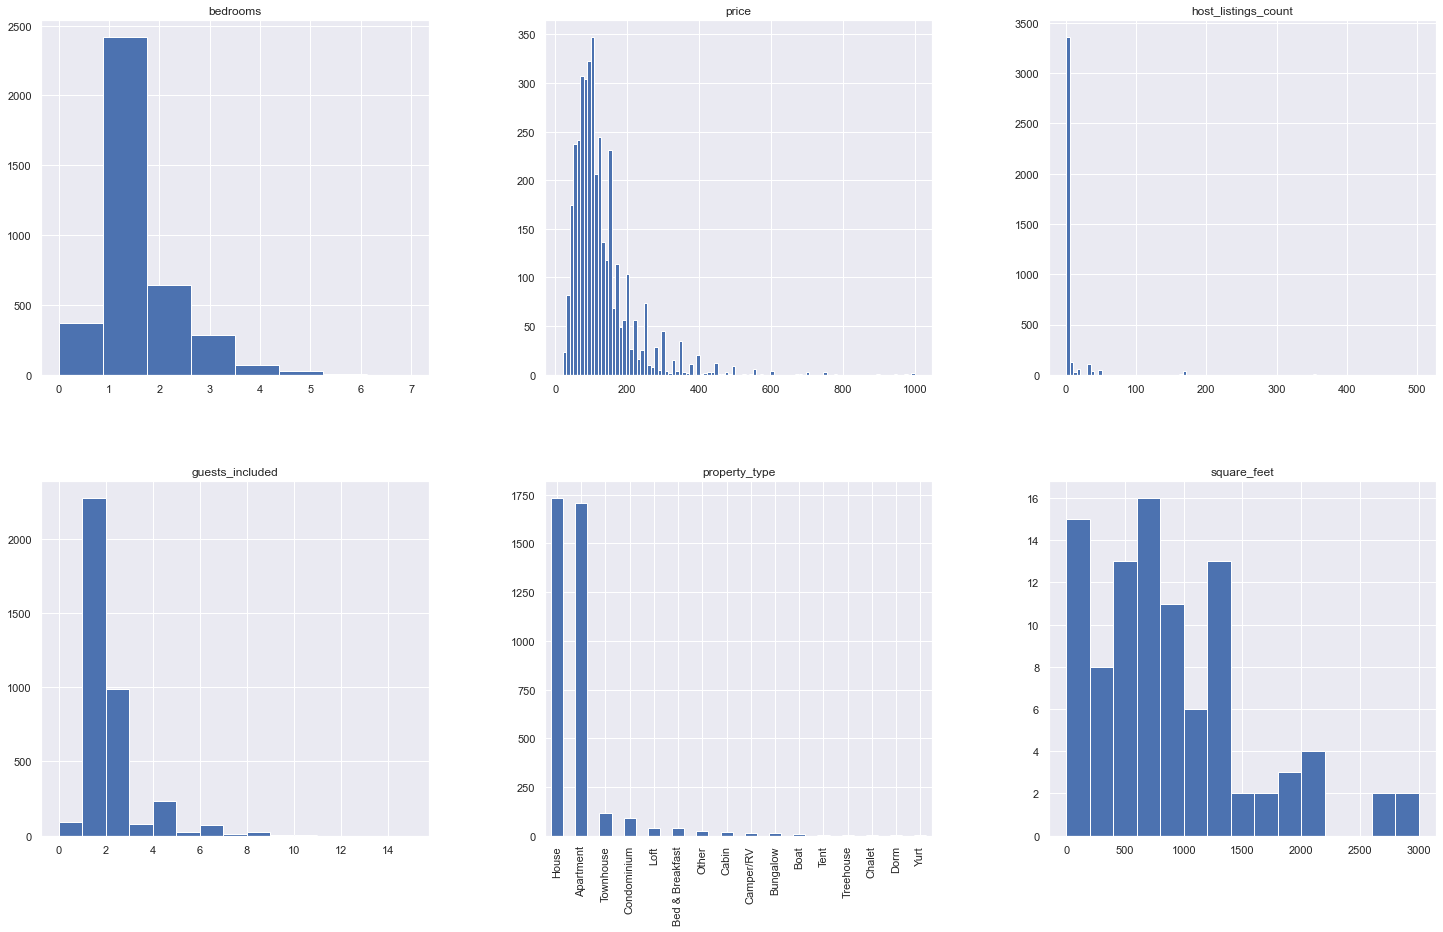

In [5]:
columns = ["price","bedrooms" , "host_listings_count" , "guests_included", "property_type"]

fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2,3, figsize=(25,15))

df_listings.hist(column="bedrooms" , ax=ax1, bins=8)
df_listings.hist(column="price" , ax=ax2, bins=100)
df_listings.hist(column="host_listings_count" , ax=ax3, bins=100)
df_listings.hist(column="guests_included" , ax=ax4, bins=15)
pd.Series(df_listings["property_type"].value_counts()).plot(kind="bar", ax= ax5, title="property_type")
df_listings.hist(column="square_feet" , ax=ax6, bins=15)


House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

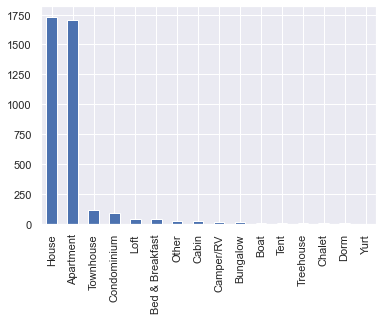

In [6]:
# check for different types of rentals

pd.Series(df_listings["property_type"].value_counts()).plot(kind="bar")
df_listings["property_type"].value_counts()


percentile 75: number of listings 3.0
percentile 76: number of listings 3.0
percentile 77: number of listings 3.0
percentile 78: number of listings 3.0
percentile 79: number of listings 3.0
percentile 80: number of listings 3.0
percentile 81: number of listings 4.0
percentile 82: number of listings 4.0
percentile 83: number of listings 4.0
percentile 84: number of listings 4.0
percentile 85: number of listings 5.0
percentile 86: number of listings 5.0
percentile 87: number of listings 6.0
percentile 88: number of listings 7.0
percentile 89: number of listings 8.0
percentile 90: number of listings 9.0
percentile 91: number of listings 11.0
percentile 92: number of listings 14.600000000000364
percentile 93: number of listings 18.950000000000273
percentile 94: number of listings 34.0
percentile 95: number of listings 34.0
percentile 96: number of listings 36.0
percentile 97: number of listings 37.0
percentile 98: number of listings 48.0
percentile 99: number of listings 169.0


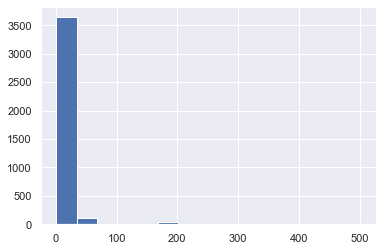

In [7]:
# check distribution of number of let apartments
df_listings.host_listings_count.hist(bins=15)
for i in range(75,100,1):
    print("percentile {}: number of listings {}".format(i,np.nanpercentile(df_listings["host_listings_count"], i, axis=0)))

# Busiest time of the year ?

what's the busiest time of the year ?
- based on availability fluctuation 
- based on price fluctuation 

<AxesSubplot:title={'center':'Availablity per Month'}, xlabel='date'>

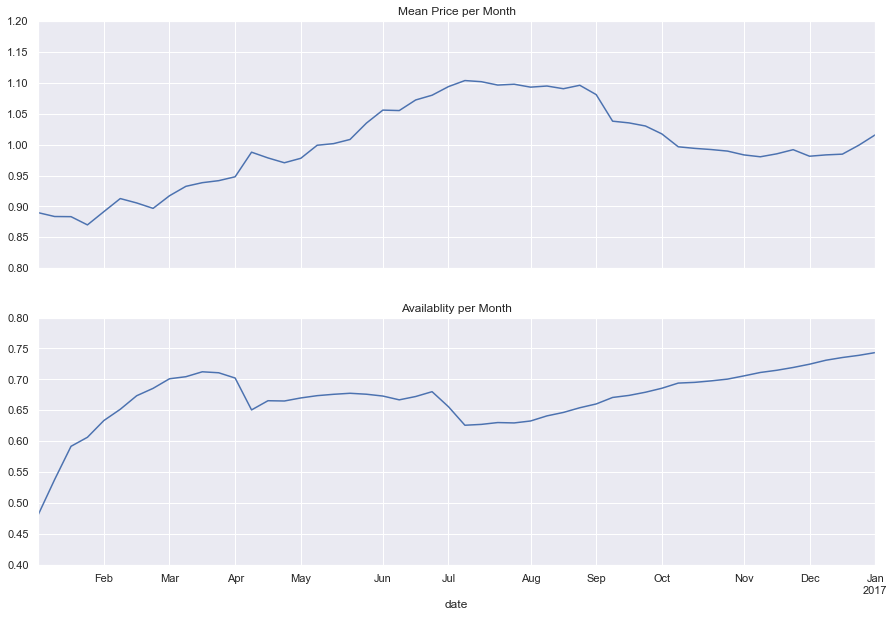

In [8]:
#setting date index excluding 2017
df_calendar.index = pd.DatetimeIndex(data = df_calendar.set_index("date").index)
df_calendar  = df_calendar[df_calendar.index.year == 2016]

#Use availability as proxy for high/low season
availb_listings_true = df_calendar["available"][df_calendar["available"]=="t"].resample("w").count()
availb_listings = availb_listings_true/df_calendar["available"].resample("w").count()



##Use mean price variance as proxy for high/low season
price_listings_mean_yr = df_calendar["price"].resample("w").mean()
price_listings = price_listings_mean_yr/ df_calendar["price"].mean()


#plotting
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(15,10), sharex= True)

price_listings.plot(title="Mean Price per Month", ax= ax1, ylim=(0.8,1.2))
availb_listings.plot(title="Availablity per Month", ax= ax2, ylim=(0.4,.8))

# What are the most popular neighbourhoods ?

- what are the most popular neighbours?
- did popularity change over time ?


In [9]:
#calculating top 10 most popular neighbourhoods based on # reviews across all years


#neighbourhoods = df.loc[:,["id", "host_neighbourhood","price","review_scores_rating"]]
pop_neighbourhoods = df_reviews.merge(df_listings.loc[:,["id","price","review_scores_rating","host_neighbourhood"]], 
                           how='left', left_on="listing_id", right_on="id", copy=True)
pop_neighbourhoods = pop_neighbourhoods.set_index(pd.to_datetime(pop_neighbourhoods["date"], dayfirst=True), drop=True)

pop_neighbourhoods_grouped = pop_neighbourhoods.groupby("host_neighbourhood")["price", "review_scores_rating"].agg(num_review_tot =("review_scores_rating", "count"),
                                                                                 mean_review =("review_scores_rating", np.mean),
                                                                                 mean_price =("price", np.mean)).sort_values(by=["num_review_tot","mean_review"], 
                                                                                      ascending=[False, False]).head(10)
display(pop_neighbourhoods_grouped.style.background_gradient(subset=['mean_review'], cmap='BuGn').background_gradient(subset=['num_review_tot'], cmap='BuGn').background_gradient(subset=['mean_price'], cmap='BuGn'));



/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  if __name__ == '__main__':


,num_review_tot,mean_review,mean_price
host_neighbourhood,,,
Capitol Hill,9230,93.406501,109.448440
Ballard,6880,96.040116,99.581105
Belltown,5455,94.155454,146.476077
Queen Anne,4932,95.487632,141.012771
Minor,4900,95.151633,103.128367
Fremont,4132,96.076234,105.242080
Wallingford,3839,95.492837,111.596354
North Beacon Hill,3072,94.361003,85.583659
Central Business District,2445,93.054397,130.745194


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


<AxesSubplot:xlabel='year', ylabel='no_review'>

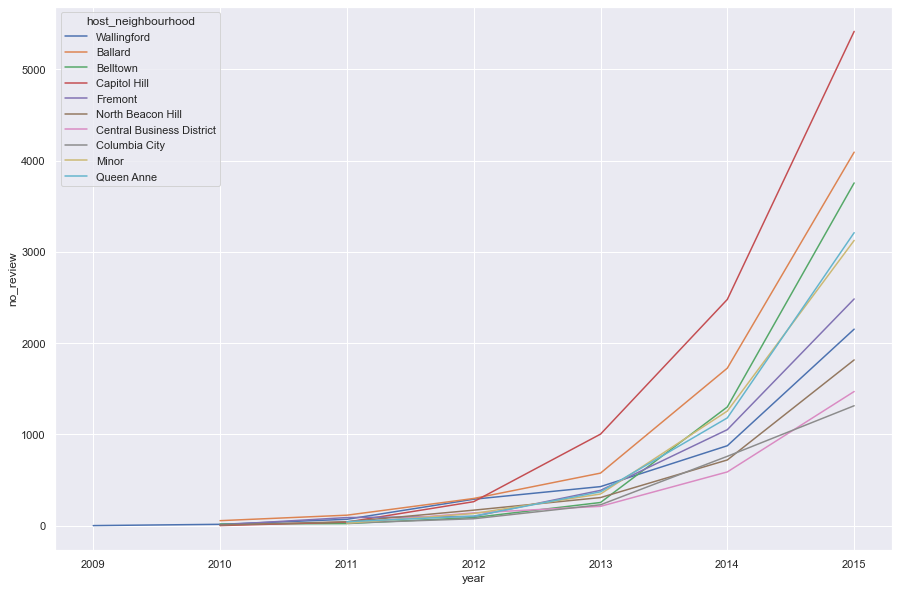

In [10]:
#breaking down popularity per year for each neighbourhood
years = np.sort(pop_neighbourhoods.index.year.unique())
pop_neighbourhoods_all_yrs = pd.DataFrame()

for year in years:
    df_ = pop_neighbourhoods[pop_neighbourhoods.index.year ==year]

    df_ = df_.groupby("host_neighbourhood")["price","review_scores_rating"].agg(mean_price =("price", np.mean), mean_review=("review_scores_rating", np.mean),no_review=("review_scores_rating", "count"))
    #df_ = df_.dropna(axis=0).sort_values(by=["no_review","mean_review"], ascending=[False, False])
    df_["year"] = year
    
    pop_neighbourhoods_all_yrs = pop_neighbourhoods_all_yrs.append(df_)


#filtering top 10 eighbourhoods from above
top10_neighbourhoods = pop_neighbourhoods_grouped.index

revenue_top10 = pop_neighbourhoods_all_yrs .reset_index().set_index(["year","host_neighbourhood"]).sort_index(level=0)
revenue_top10  = revenue_top10[revenue_top10.index.isin(top10_neighbourhoods, level=1)].drop(2016,axis=0)

#calculating revenues for each neighbourhood based on mean price & # of reviews
revenue_top10["revenue"]=revenue_top10.mean_price*revenue_top10.no_review
revenue_top10 = revenue_top10.reset_index("host_neighbourhood").loc[:,("host_neighbourhood","revenue","no_review")]


#plotting
fig, ax = plt.subplots(1,1, figsize=(15,10))
sns.lineplot(data=revenue_top10 , x=revenue_top10 .index, y="no_review", hue="host_neighbourhood")




# Price development


- What's the proportion of the top 10% airbnb renters to the overall renters ?
- How did prices develop amd who is profiting most ?
- What are the main price drivers ?

<AxesSubplot:title={'center':"top 10 aribnbs' share of total revenue "}>

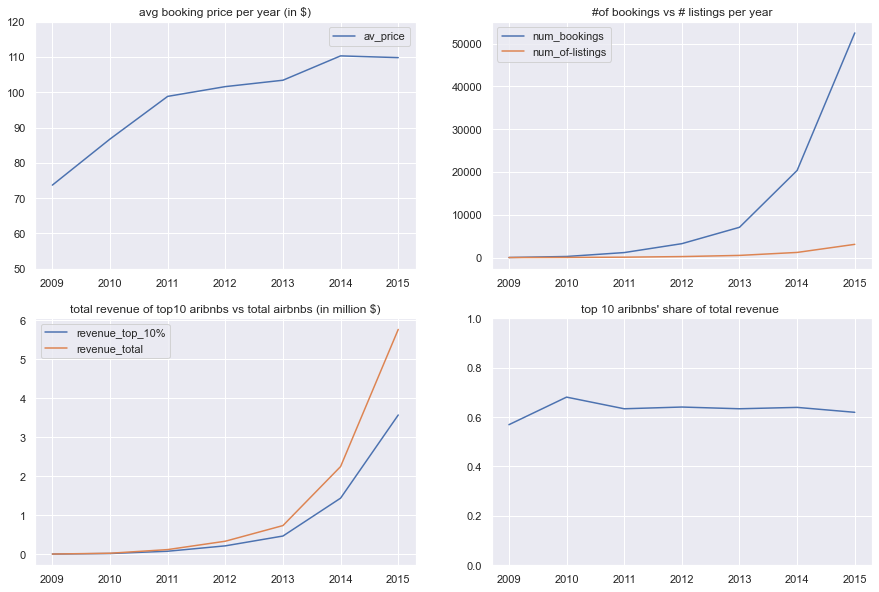

In [11]:
#merge listings and reviews datasets

merged = df_reviews.merge(df_listings.loc[:,["id","price","property_type"]], how='left', left_on="listing_id", right_on="id", copy=True)
merged.index = pd.DatetimeIndex(merged["date"])
merged = merged[merged.index.year!=2016]
years = np.sort(merged.index.year.unique())

#fetching avg price, revenues & # of booking per year for all and top10 airbnbs
revenue_per_year = {"revenue_top_10%":[], "revenue_total":[]}
av_price_per_year = []
num_bookings_per_year = []

for year in years:
    df_ = merged[merged.index.year==year]
    df_ = df_.groupby(["listing_id","property_type"])["price"].agg(
        total_earnings = lambda x: x.mean()*x.count(),
            avg_price="mean",
                num_bookings ="count", ).sort_values(by="total_earnings", ascending=False)
    
    
    quantile = np.array(df_["total_earnings"].quantile([.9]))[0]
    
    revenue_per_year["revenue_top_10%"].append(df_["total_earnings"][df_["total_earnings"] < quantile].sum()/1000000)
    revenue_per_year["revenue_total"].append(df_["total_earnings"].sum()/1000000)
    av_price_per_year.append(df_["total_earnings"].sum()/df_["num_bookings"].sum())
    num_bookings_per_year.append(df_["num_bookings"].sum())

    
#plotting  
fig, ((ax1, ax2),(ax3, ax4))  = plt.subplots(2,2, figsize=(15,10))

pd.DataFrame({"av_price":av_price_per_year}, index= years).plot(title="avg booking price per year (in $)", ax=ax1,ylim=(50,120))
pd.DataFrame({"num_bookings":num_bookings_per_year, "num_of-listings":list(merged["listing_id"].resample("Y").nunique())}, index= years).plot(title="#of bookings vs # listings per year",ax=ax2)
pd.DataFrame(revenue_per_year, index= years).plot(title="total revenue of top10 aribnbs vs total airbnbs (in million $)",ax=ax3)
pd.Series(np.array(revenue_per_year["revenue_top_10%"]) / np.array(revenue_per_year["revenue_total"]), index=years).plot(title="top 10 aribnbs' share of total revenue ",ax=ax4,ylim=(0,1))



